## 패키지 임포트

In [1]:
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

C:\Users\taeeu\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\taeeu\anaconda3\lib\site-packages\numpy\.libs\libopenblas.el2c6ple4zyw3eceviv3oxxgrn2nrfm2.gfortran-win_amd64.dll
C:\Users\taeeu\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## 월별 plot

In [2]:
df=pd.read_csv('a10.csv', parse_dates=['date'], index_col=None)

In [3]:
df['year']=[d.year for d in df.date]
df['month']=[d.strftime('%b') for d in df.date]
years=df['year'].unique()

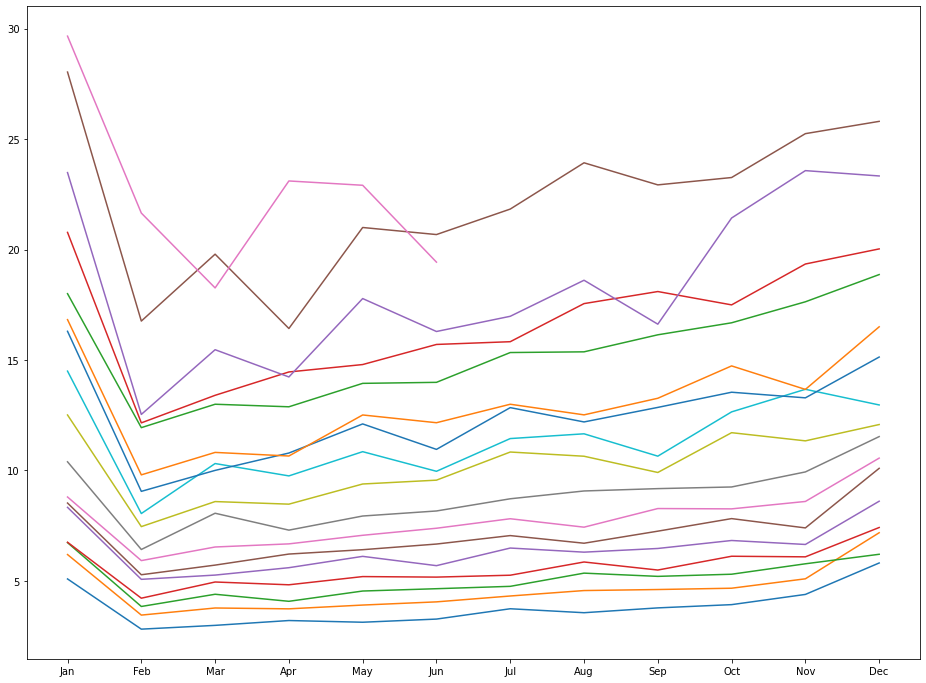

In [4]:
#계절 패턴 : 두 달에 한 번 꼴로 추락 및 상승
#그러나 전반적인 경향은 해가 갈수록 증가
plt.figure(figsize=(16,12))
for i, y in enumerate(years):
    if i > 0:
        plt.plot('month', 'value', data=df.loc[df.year==y, :], label=y)

## 계절/추세 변동

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
#date컬럼을 datetime형태로 로드=> index로 지정
df=pd.read_csv('a10.csv', parse_dates=['date'],index_col='date')

In [6]:
print(df)

                value
date                 
1991-07-01   3.526591
1991-08-01   3.180891
1991-09-01   3.252221
1991-10-01   3.611003
1991-11-01   3.565869
...               ...
2008-02-01  21.654285
2008-03-01  18.264945
2008-04-01  23.107677
2008-05-01  22.912510
2008-06-01  19.431740

[204 rows x 1 columns]


In [7]:
# 분해하여 결과를 저장
# additive model:가법모델
# multiplicative model:승법모델
result_mul=seasonal_decompose(df['value'], model='multiplicative')
result_add=seasonal_decompose(df['value'], model='additive')

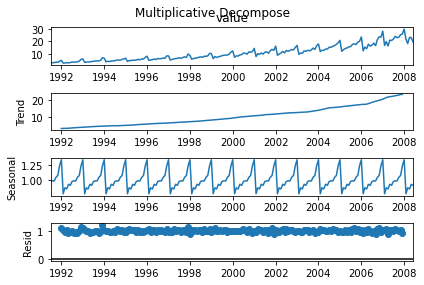

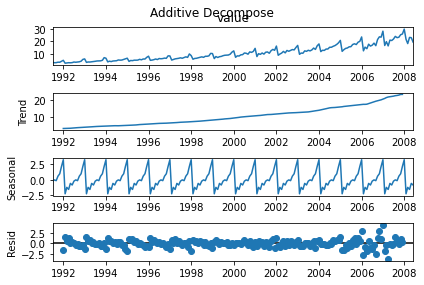

In [8]:
#plot
#승법모델
result_mul.plot().suptitle('Multiplicative Decompose')
#가법모델
result_add.plot().suptitle('Additive Decompose')
plt.show()